In [1]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
data_dir = os.getenv('HOME')+'/aiffel/datathon/data'

floating_data_path = join(data_dir, 'SeoulFloating.csv')

floating = pd.read_csv(floating_data_path)

In [3]:
print('floating data dim : {}'.format(floating.shape))

floating data dim : (1084800, 7)


In [4]:
print(floating.columns)

Index(['date', 'hour', 'birth_year', 'sex', 'province', 'city', 'fp_num'], dtype='object')


In [5]:
floating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084800 entries, 0 to 1084799
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   date        1084800 non-null  object
 1   hour        1084800 non-null  int64 
 2   birth_year  1084800 non-null  int64 
 3   sex         1084800 non-null  object
 4   province    1084800 non-null  object
 5   city        1084800 non-null  object
 6   fp_num      1084800 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 57.9+ MB


In [6]:
floating.head()

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


In [7]:
floating.tail()

,date,hour,birth_year,sex,province,city,fp_num
1084795,2020-05-31,21,40,female,Seoul,Dobong-gu,27620
1084796,2020-05-31,21,40,female,Seoul,Songpa-gu,56560
1084797,2020-05-31,21,50,female,Seoul,Gangdong-gu,38960
1084798,2020-05-31,22,60,female,Seoul,Guro-gu,25420
1084799,2020-05-31,23,40,male,Seoul,Eunpyeong-gu,38650


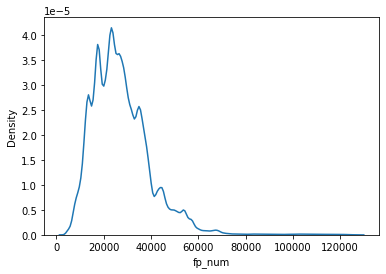

In [8]:
sns.kdeplot(floating['fp_num'])
plt.show()

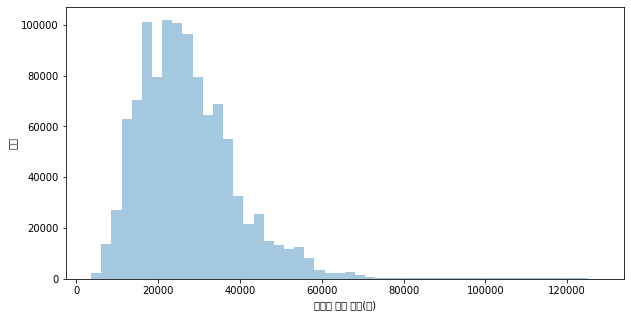

In [9]:
plt.figure(figsize=(10,5)) # 빈 캔버스 사이즈 지정
dist=sns.distplot(floating['fp_num'],kde=False) # kde=False를 넣어보자
dist.set_xlabel("바이크 주행 시간(분)")
dist.set_ylabel("비율")
plt.show() # 다 그려진 캔버스 보여주기

# 정부 정책에 따른 확진자수 변화 

In [10]:
data_dir = os.getenv('HOME')+'/aiffel/datathon/data'

policy_data_path = join(data_dir, 'Policy.csv')

policy = pd.read_csv(policy_data_path)

In [11]:
policy.tail()

,policy_id,country,type,gov_policy,detail,start_date,end_date
56,57,Korea,Transformation,Logistics center,On-site inspection of major logistics faciliti...,2020-05-29,2020-06-11
57,58,Korea,Transformation,Wearing of masks,"Mandatory wearing of passenger mask domestic, ...",2020-05-27,NaN
58,59,Korea,Transformation,Wearing of masks,Drivers such as buses and taxis can refuse to ...,2020-05-26,NaN
59,60,Korea,Technology,KI-Pass: Korea Internet - Pass,new quick response (QR) code system this week ...,2020-06-10,NaN
60,61,Korea,Health,Extends Tightened Quarantine Measures,Gov't Extends Tightened Quarantine Measures in...,2020-05-28,2020-06-14


In [12]:
patient_data_path = join(data_dir, 'PatientInfo.csv')

patient = pd.read_csv(patient_data_path)
#patient["confirmed_date"] = pd.to_datetime(patient["confirmed_date"])
print(patient.shape)

(5165, 14)


In [44]:
patient.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [14]:
# patient_null = patient['patient_id'].dropna()
# print(patient_null.shape)
# patient.tail()

In [15]:
#x축
from datetime import datetime
duration = patient["confirmed_date"].unique()
# duration = pd.to_datetime(duration)

duration= duration[:-1]
duration = pd.to_datetime(duration).sort_values()
print(duration)
type(duration)
# duration=duration.loc[datetime(2020, 1, 23):datetime(2020, 6, 30)]

DatetimeIndex(['2020-01-20', '2020-01-23', '2020-01-26', '2020-01-27',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-05',
               ...
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
               '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', length=148, freq=None)


pandas.core.indexes.datetimes.DatetimeIndex

In [16]:
#y축
# patient.groupby(patient['confirmed_date']).count() 
confirmed_case = patient["confirmed_date"].value_counts()
print(confirmed_case.shape)
confirmed_case = confirmed_case.sort_index() 

(148,)


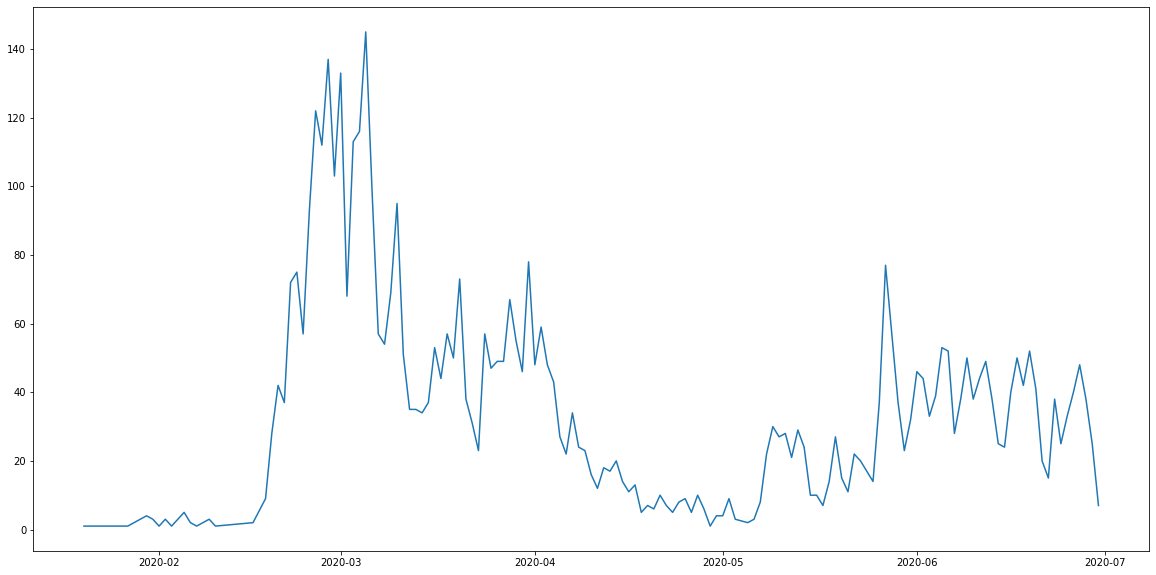

In [17]:
plt.figure(figsize=(20,10)) 
plt.plot(duration,confirmed_case)
plt.show()

확진자 감소 추이가 

In [18]:
search_data_path = join(data_dir, 'SearchTrend.csv')

search = pd.read_csv(search_data_path)
#patient["confirmed_date"] = pd.to_datetime(patient["confirmed_date"])
print(search.shape)

(1642, 5)


In [19]:
search.columns

Index(['date', 'cold', 'flu', 'pneumonia', 'coronavirus'], dtype='object')

In [20]:
search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1642 non-null   object 
 1   cold         1642 non-null   float64
 2   flu          1642 non-null   float64
 3   pneumonia    1642 non-null   float64
 4   coronavirus  1642 non-null   float64
dtypes: float64(4), object(1)
memory usage: 64.3+ KB


In [21]:
search["date"] = pd.to_datetime(search["date"])

In [22]:
cov = search[(search['date']>='2020-01-01') & (search['date']<='2020-05-31')]
cov.head()

,date,cold,flu,pneumonia,coronavirus
1461,2020-01-01,0.14454,0.48434,0.44880,0.01699
1462,2020-01-02,0.19508,0.85751,0.36471,0.01827
1463,2020-01-03,0.19581,0.80443,0.46598,0.02845
1464,2020-01-04,0.60343,0.86961,0.49571,0.02136
1465,2020-01-05,0.20081,0.84152,0.41644,0.01927


In [23]:
cov = cov.set_index('date')

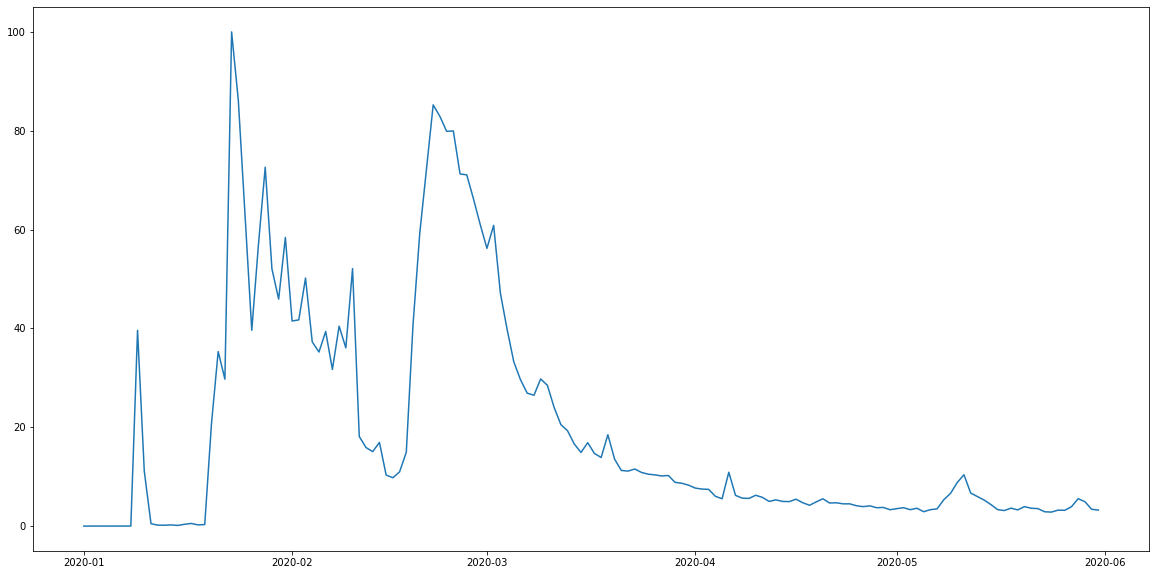

In [24]:
covid = cov["coronavirus"]
plt.figure(figsize=(20,10)) 
plt.plot(covid)
plt.show()

In [25]:
cold = cov["cold"]
flu = cov["flu"]
pne = cov["pneumonia"]

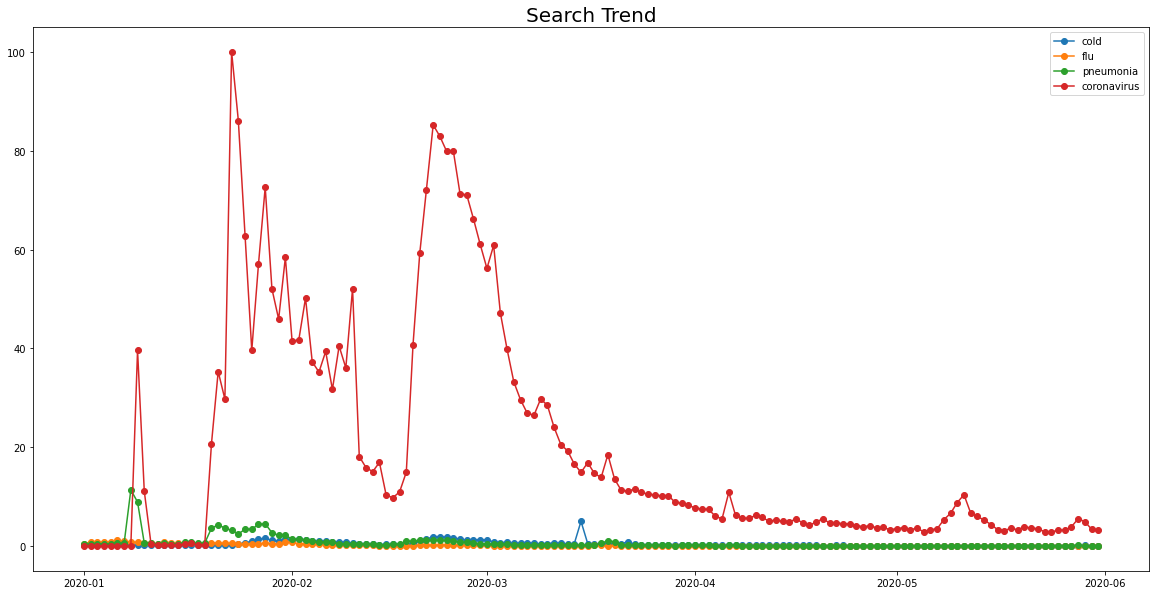

In [26]:
fig = plt.figure(figsize=(20,10)) 
ax = fig.add_subplot()

ax.plot(cold,marker='o',label='cold') ## 선그래프 생성
ax.plot(flu,marker='o',label='flu') 
ax.plot(pne,marker='o',label='pneumonia') 
ax.plot(covid,marker='o',label='coronavirus') 
ax.legend() ## 범례

plt.title('Search Trend',fontsize=20)
plt.show()

In [27]:
floating2 = pd.read_csv(floating_data_path)

# 일자별 이동량 합산

In [28]:
fl = floating2.groupby(by = 'date').fp_num.agg('sum')
fl

date
2020-01-01    192406170
2020-01-02    202929360
2020-01-03    203337150
2020-01-04    197396050
2020-01-05    195747670
                ...    
2020-05-27    199293080
2020-05-28    199209840
2020-05-29    140847320
2020-05-30    189674150
2020-05-31    188346500
Name: fp_num, Length: 151, dtype: int64

In [29]:
# a = fl.max()
# index = fl.index(a)
# index
fl[fl == fl.max()].index[0]

'2020-02-23'

In [30]:
floating2[floating2["date"] =='2020-02-23'] 

,date,hour,birth_year,sex,province,city,fp_num
381600,2020-02-23,0,20,female,Seoul,Dobong-gu,38930
381601,2020-02-23,0,20,male,Seoul,Dobong-gu,39140
381602,2020-02-23,0,20,female,Seoul,Dongdaemun-gu,55030
381603,2020-02-23,0,20,male,Seoul,Dongdaemun-gu,59200
381604,2020-02-23,0,20,female,Seoul,Dongjag-gu,62770
...,...,...,...,...,...,...,...
388795,2020-02-23,23,70,male,Seoul,Yangcheon-gu,23960
388796,2020-02-23,23,70,female,Seoul,Yeongdeungpo-gu,35230
388797,2020-02-23,23,70,male,Seoul,Yeongdeungpo-gu,26130
388798,2020-02-23,23,70,female,Seoul,Yongsan-gu,25000


In [31]:
fl[fl == fl.min()].index[0]

'2020-05-29'

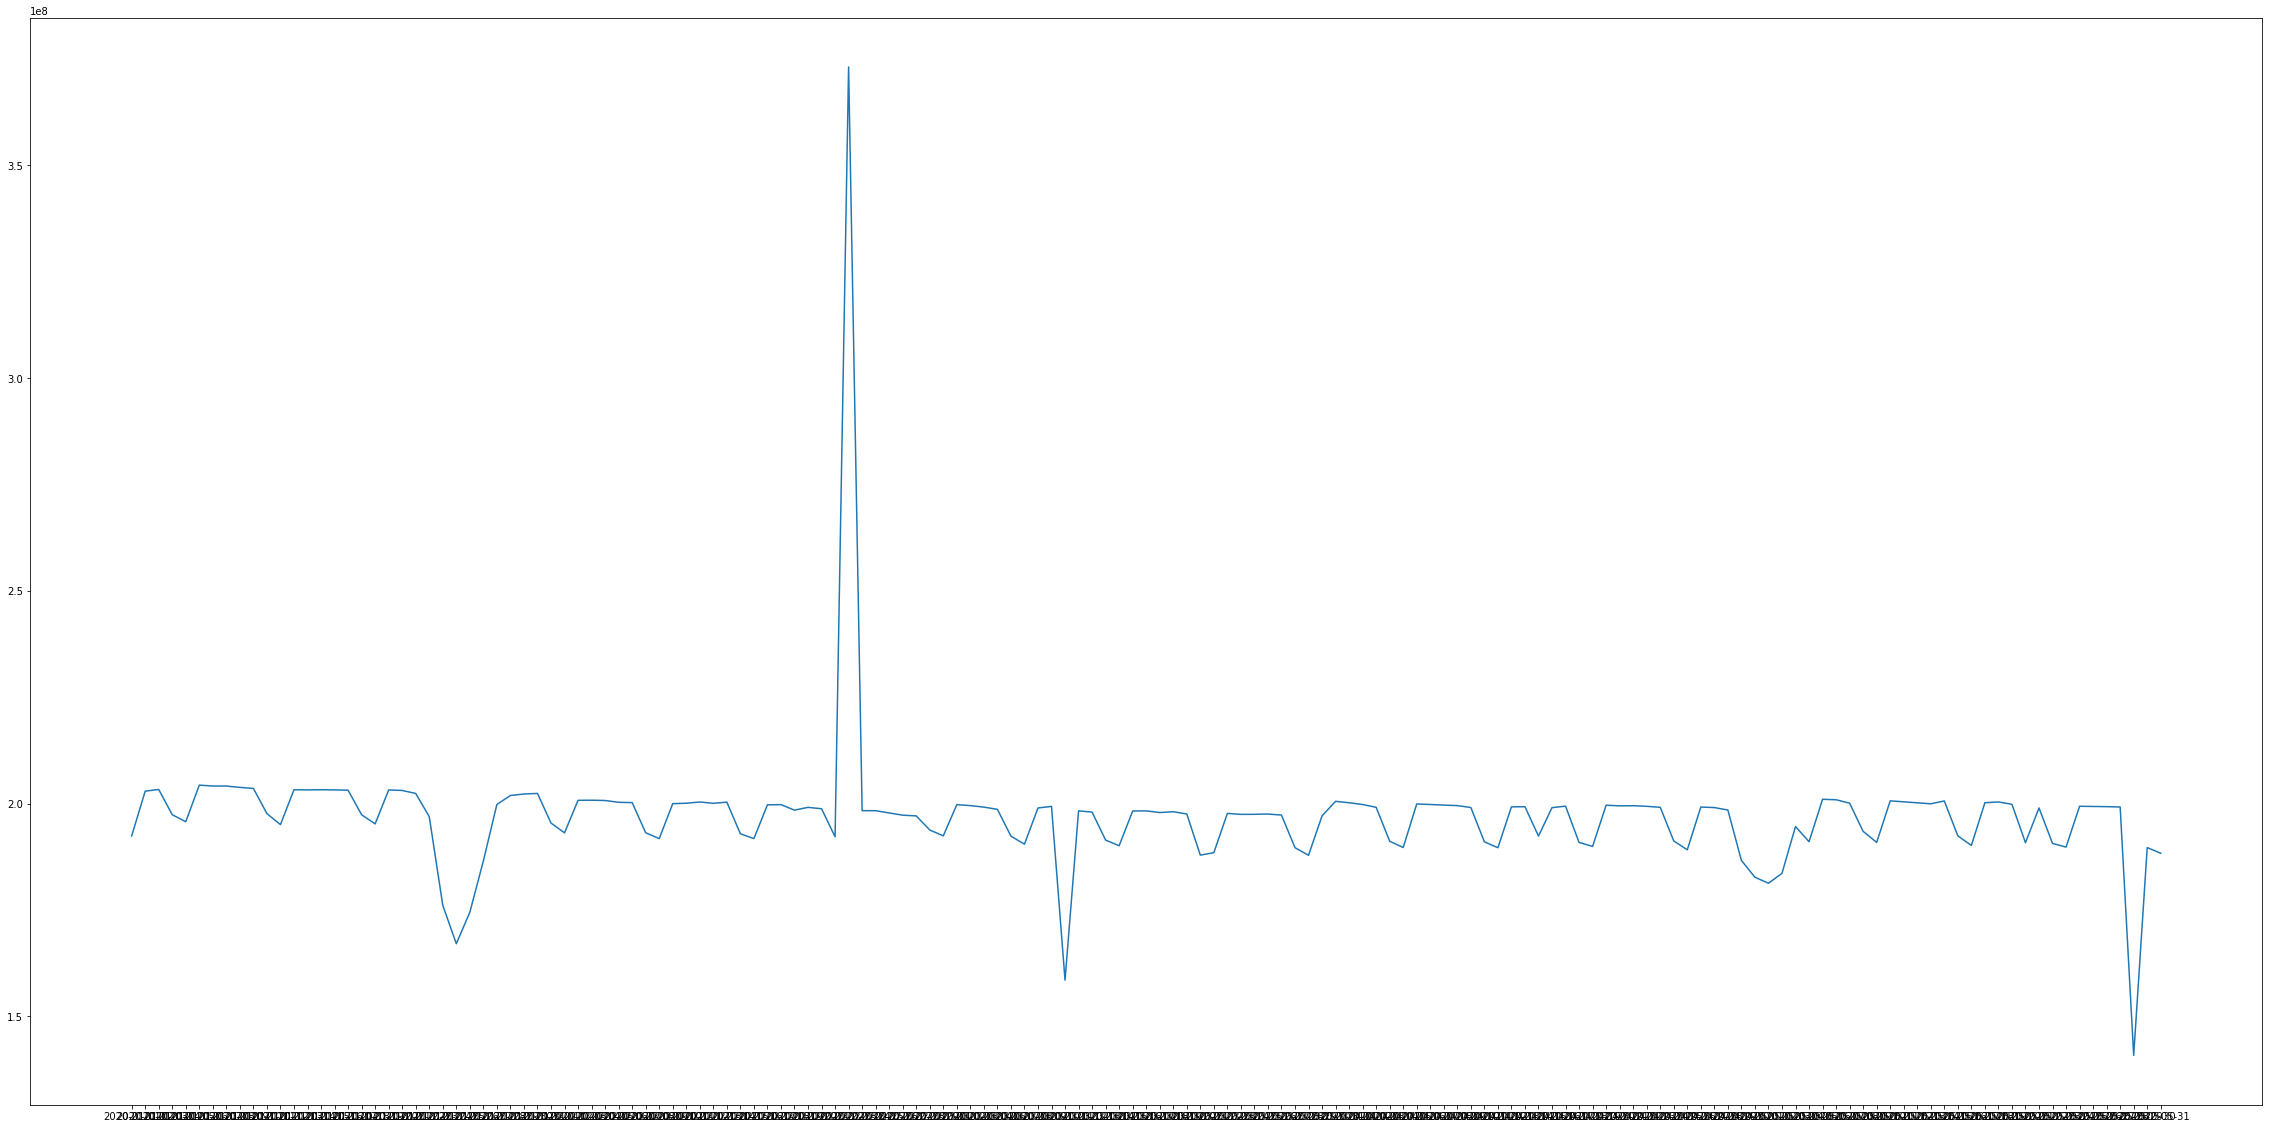

In [32]:
plt.figure(figsize=(40,20)) 
plt.plot(fl)
plt.show()

# 연령대별 이동량 계산

In [33]:
from datetime import datetime

# floating2.date = pd.to_datetime(floating2["date"])
# floating2 = floating2.set_index('date')
floating2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084800 entries, 0 to 1084799
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   date        1084800 non-null  object
 1   hour        1084800 non-null  int64 
 2   birth_year  1084800 non-null  int64 
 3   sex         1084800 non-null  object
 4   province    1084800 non-null  object
 5   city        1084800 non-null  object
 6   fp_num      1084800 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 57.9+ MB


In [34]:
birth = floating2.groupby(by = 'birth_year').fp_num.agg('sum')
birth.head()

birth_year
20    5441769700
30    6069018790
40    6054699830
50    5675739830
60    3706127050
Name: fp_num, dtype: int64

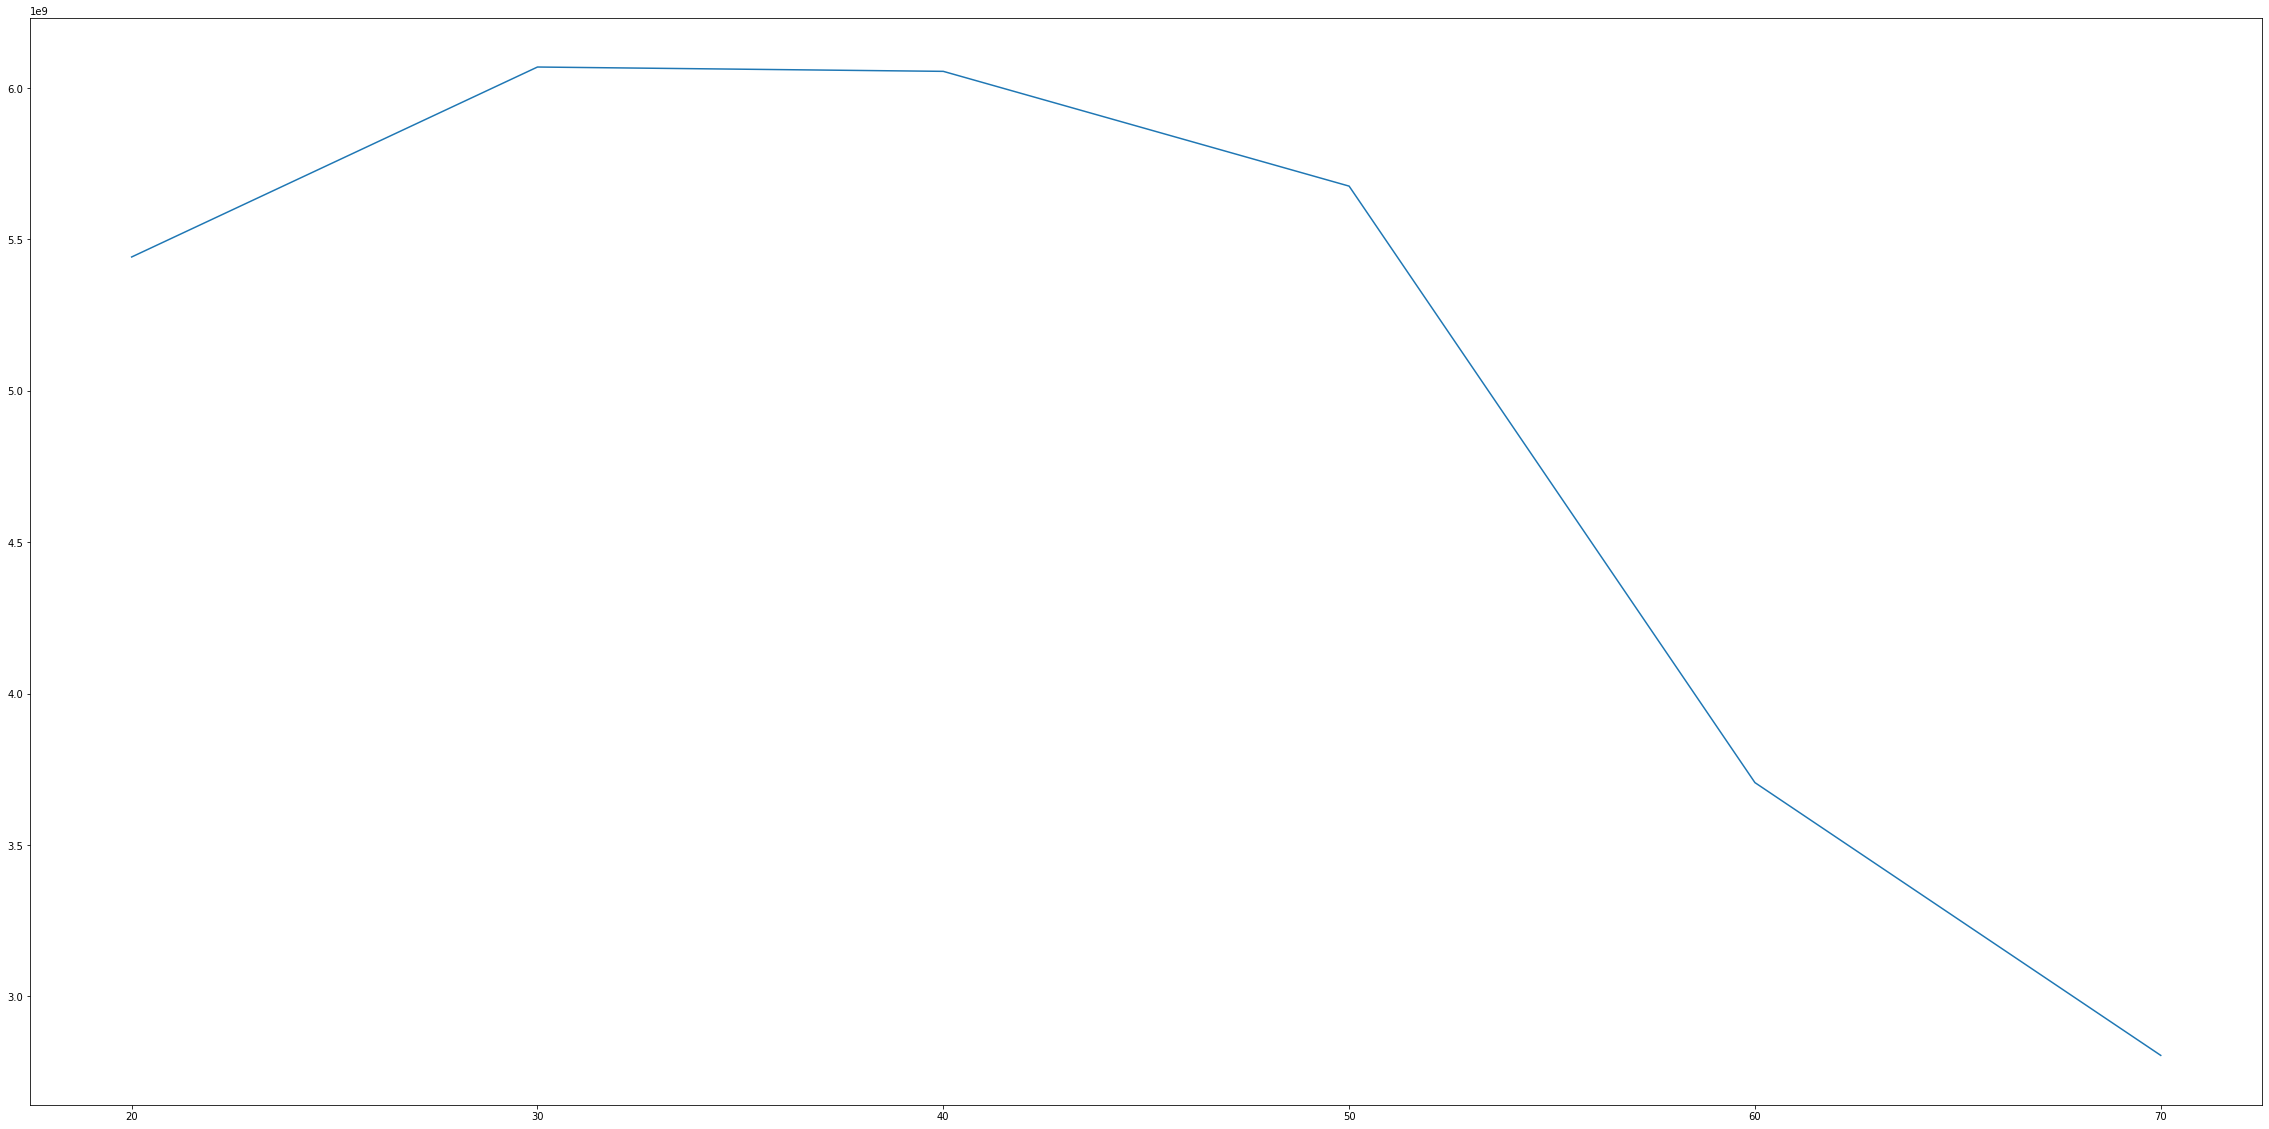

In [35]:
plt.figure(figsize=(40,20)) 
plt.plot(birth)
plt.show()

경제활동이 활발한 30-40대의 이동량이 많은 것을 볼 수 있다.

In [36]:
twn = floating2[floating2["birth_year"] == 20]
twn.head()
twn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180800 entries, 0 to 1084794
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        180800 non-null  object
 1   hour        180800 non-null  int64 
 2   birth_year  180800 non-null  int64 
 3   sex         180800 non-null  object
 4   province    180800 non-null  object
 5   city        180800 non-null  object
 6   fp_num      180800 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 11.0+ MB


In [37]:
twn["date"] = pd.to_datetime(twn["date"])
twn = pd.DataFrame(twn)
# twn = twn.groupby(by = 'date').agg((fp_num='sum'))
type(twn)
twn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180800 entries, 0 to 1084794
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        180800 non-null  datetime64[ns]
 1   hour        180800 non-null  int64         
 2   birth_year  180800 non-null  int64         
 3   sex         180800 non-null  object        
 4   province    180800 non-null  object        
 5   city        180800 non-null  object        
 6   fp_num      180800 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 11.0+ MB


### 각 연령대별 일자-시간별 이동량 합계

In [38]:
twn_sum = twn.groupby(['date','hour']).agg({"fp_num" : sum})
twn_sum

fp_num
date       hour         
2020-01-01 0     1448180
           1     1433590
           2     1424810
           3     1416150
           4     1411090
...                  ...
2020-05-31 19    1498700
           20    1496200
           21    1488870
           22    1478950
           23    1468280

[3616 rows x 1 columns]

In [39]:
twn_sum_daily = twn.groupby(['date']).agg({"fp_num" : sum})
# twn_sum_daily = pd.DataFrame(twn_sum_daily)
twn_sum_daily.index


DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-05-30', '2020-05-31'],
              dtype='datetime64[ns]', name='date', length=151, freq=None)

In [94]:
# 2. 데이터 준비
x = twn_sum_daily[(twn_sum_daily.index >='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
y1 = twn_sum_daily.fp_num[(twn_sum_daily.index>='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
y2 = confirmed_case[(confirmed_case.index>='2020-01-20') & (confirmed_case.index<='2020-05-31')]
y2 = pd.DataFrame(y2)
y2_date =  pd.date_range('2020-01-20', '2020-05-31')
y1

date
2020-01-20    36476130
2020-01-21    36363570
2020-01-22    36066830
2020-01-23    34611120
2020-01-24    29333360
                ...   
2020-05-27    36798640
2020-05-28    36811520
2020-05-29    26027020
2020-05-30    35840240
2020-05-31    35317500
Name: fp_num, Length: 132, dtype: int64

In [97]:
y11 = y1.copy()
y11.index = pd.DatetimeIndex(y11.index)
y11 = y11.reindex(y2_date, fill_value=0)
y11[y11 == 0]

2020-03-05    0
Freq: D, Name: fp_num, dtype: int64

In [85]:
y22 = y2.copy()
y22.index = pd.DatetimeIndex(y22.index)
y22 = y22.reindex(y2_date, fill_value=0)
y22

,confirmed_date
2020-01-20,1
2020-01-21,0
2020-01-22,0
2020-01-23,1
2020-01-24,0
...,...
2020-05-27,77
2020-05-28,57
2020-05-29,37
2020-05-30,23


In [95]:
x_date = x.index
print(x_date)

DatetimeIndex(['2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29',
               ...
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-05-30', '2020-05-31'],
              dtype='datetime64[ns]', name='date', length=132, freq=None)


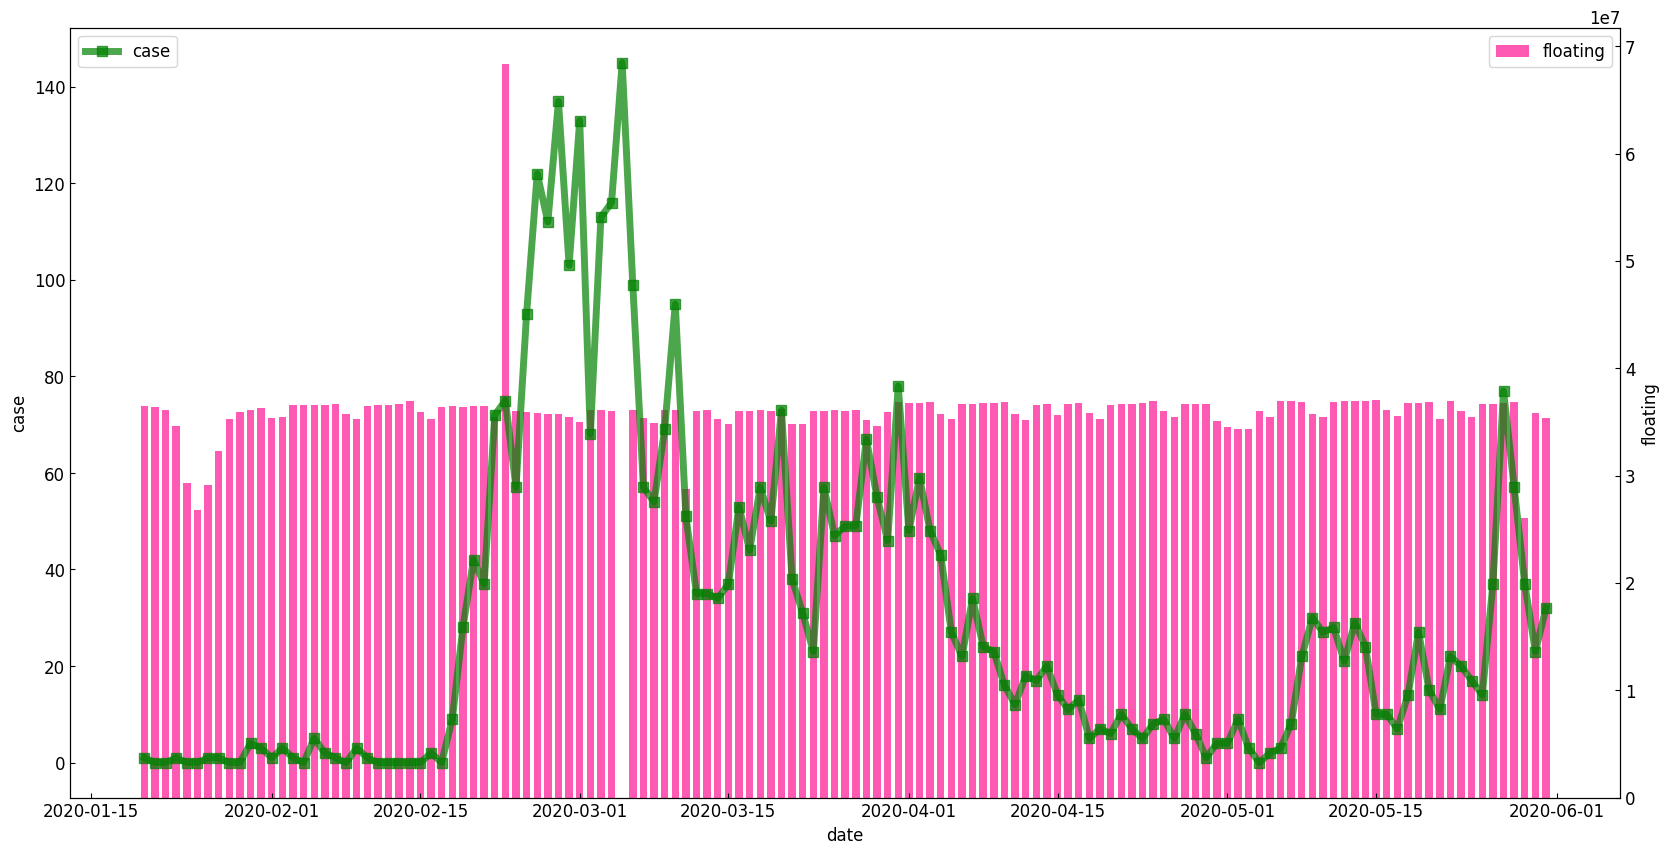

In [103]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
# x = twn_sum_daily[(twn_sum_daily.index >='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y1 = twn_sum_daily.fp_num[(twn_sum_daily.index>='2020-01-20') & (twn_sum_daily.index<='2020-05-31')]
# y2 = confirmed_case
# y2_1 = confirmed_case.astype(int)

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(y2_date, y22, '-s', color='green', markersize=7, linewidth=5, alpha=0.7, label='case')
ax1.set_xlabel('date')
ax1.set_ylabel('case')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(y2_date, y11, color='deeppink', label='floating', alpha=0.7, width=0.7)
ax2.set_ylabel(r'floating')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [101]:
thr = floating2[floating2["birth_year"] == 30]
thr.head()

,date,hour,birth_year,sex,province,city,fp_num
1200,2020-01-01,0,30,female,Seoul,Dobong-gu,21950
1201,2020-01-01,0,30,male,Seoul,Dobong-gu,22230
1202,2020-01-01,0,30,female,Seoul,Dongdaemun-gu,26060
1203,2020-01-01,0,30,male,Seoul,Dongdaemun-gu,28910
1204,2020-01-01,0,30,female,Seoul,Dongjag-gu,31610


In [102]:
thr["date"] = pd.to_datetime(thr["date"])
thr = pd.DataFrame(thr)
thr_sum = thr.groupby(['date','hour']).agg({"fp_num" : sum})
thr_sum

fp_num
date       hour         
2020-01-01 0     1583570
           1     1571090
           2     1562770
           3     1556670
           4     1551960
...                  ...
2020-05-31 19    1617240
           20    1624790
           21    1629130
           22    1630060
           23    1628230

[3616 rows x 1 columns]

In [ ]:
four = floating2[floating2["birth_year"] == 40]
four.head()

In [ ]:
four["date"] = pd.to_datetime(four["date"])
four = pd.DataFrame(four)
four_sum = four.groupby(['date','hour']).agg({"fp_num" : sum})
four_sum

In [ ]:
fth = floating2[floating2["birth_year"] == 50]
fth.head()

In [ ]:
fth["date"] = pd.to_datetime(fth["date"])
fth = pd.DataFrame(fth)
fth_sum = fth.groupby(['date','hour']).agg({"fp_num" : sum})
fth_sum

In [ ]:
sth = floating2[floating2["birth_year"] == 60]
sth.head()

In [ ]:
sth["date"] = pd.to_datetime(sth["date"])
sth = pd.DataFrame(sth)
sth_sum = sth.groupby(['date','hour']).agg({"fp_num" : sum})
sth_sum

In [ ]:
svt = floating2[floating2["birth_year"] == 70]
svt.head()

In [ ]:
svt["date"] = pd.to_datetime(svt["date"])
svt = pd.DataFrame(svt)
svt_sum = svt.groupby(['date','hour']).agg({"fp_num" : sum})
svt_sum

In [ ]:
eld = svt.groupby(['date','hour']).agg({"fp_num" : sum}) + sth.groupby(['date','hour']).agg({"fp_num" : sum})
eld

In [ ]:
mid = fth.groupby(['date','hour']).agg({"fp_num" : sum}) + four.groupby(['date','hour']).agg({"fp_num" : sum})
mid

In [ ]:
fre = twn.groupby(['date','hour']).agg({"fp_num" : sum}) + thr.groupby(['date','hour']).agg({"fp_num" : sum})
fre

In [ ]:
week_date = floating2.copy()
week_date["date"] = pd.to_datetime(week_date["date"])
week_date.info()

In [ ]:
week_date.groupby(week_date['date'].dt.strftime("%W")).sum()

In [ ]:
week_data.head()

In [ ]:
plt.figure(figsize=(40,20)) 
plt.scatter(floating2['date'],floating2['hour'],s=100*floating2['fp_num'],c=floating2['birth_year'],cmap=plt.cm.get_cmap('prism', floating2['birth_year'].nunique()),edgecolors='black')
plt.xlabel('date')
plt.ylabel('hour')
cb=plt.colorbar(label='move')
cb.set_ticks([0,1,2,4,5,6])
cb.set_ticklabels(["20","30","40","50","60","70"])
plt.show()

# Patient info

In [104]:
patient_data_path = join(data_dir, 'PatientInfo.csv')

patient = pd.read_csv(patient_data_path)
patient.info()
patient=pd.DataFrame(patient)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5165 non-null   object
dtypes: int64(1), object(13)
memory usage: 565.0+ KB


In [105]:
patient[patient['confirmed_date'].isnull()]

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
4730,6011000051,female,40s,Korea,Gyeongsangbuk-do,Andong-si,etc,NaN,NaN,NaN,NaN,NaN,NaN,released
4731,6011000052,female,0s,Korea,Gyeongsangbuk-do,Andong-si,etc,NaN,NaN,NaN,NaN,NaN,NaN,released
4732,6011000053,female,10s,Korea,Gyeongsangbuk-do,Andong-si,etc,NaN,NaN,2020-04-15,NaN,NaN,NaN,released


In [ ]:
patient = patient.drop(axis = 0,index = [4730,4731,4732])
patient[patient['confirmed_date'].isnull()]

In [ ]:
patient["confirmed_date"] = pd.to_datetime(patient["confirmed_date"])
days = patient["confirmed_date"].dt.day

In [ ]:
patient["confirmed_date"]= pd.to_datetime(patient["confirmed_date"])

In [109]:
death = patient.iloc[:,[2,4,13]]
death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       3785 non-null   object
 1   province  5165 non-null   object
 2   state     5165 non-null   object
dtypes: object(3)
memory usage: 121.2+ KB


In [117]:
death.loc[death.state == 'deceased']

,age,province,state
12,80s,Seoul,deceased
108,90s,Seoul,deceased
284,40s,Seoul,deceased
472,60s,Seoul,deceased
996,NaN,Seoul,deceased
...,...,...,...
4903,60s,Gyeongsangbuk-do,deceased
4904,50s,Gyeongsangbuk-do,deceased
4905,60s,Gyeongsangbuk-do,deceased
4906,50s,Gyeongsangbuk-do,deceased


In [111]:
death_nnull = patient.iloc[:,[2,4,13]]
death_nnull[death_nnull['age'].isnull()]

,age,province,state
563,NaN,Seoul,released
564,NaN,Seoul,released
565,NaN,Seoul,released
566,NaN,Seoul,released
567,NaN,Seoul,released
...,...,...,...
5142,NaN,Gyeongsangnam-do,released
5161,NaN,Jeju-do,released
5162,NaN,Jeju-do,isolated
5163,NaN,Jeju-do,isolated


In [113]:
death_nnull = death_nnull.dropna()
death_nnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3785 entries, 0 to 5160
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       3785 non-null   object
 1   province  3785 non-null   object
 2   state     3785 non-null   object
dtypes: object(3)
memory usage: 118.3+ KB


In [122]:
per_age = death_nnull.loc[death_nnull.state == 'deceased']
per_age

,age,province,state
12,80s,Seoul,deceased
108,90s,Seoul,deceased
284,40s,Seoul,deceased
472,60s,Seoul,deceased
1382,70s,Busan,deceased
...,...,...,...
4903,60s,Gyeongsangbuk-do,deceased
4904,50s,Gyeongsangbuk-do,deceased
4905,60s,Gyeongsangbuk-do,deceased
4906,50s,Gyeongsangbuk-do,deceased


In [133]:
age = per_age["age"].apply(list)
age.to_list()

[['30s'],
 ['40s', '40s'],
 ['50s', '50s', '50s', '50s', '50s', '50s', '50s'],
 ['60s',
  '60s',
  '60s',
  '60s',
  '60s',
  '60s',
  '60s',
  '60s',
  '60s',
  '60s',
  '60s',
  '60s'],
 ['70s',
  '70s',
  '70s',
  '70s',
  '70s',
  '70s',
  '70s',
  '70s',
  '70s',
  '70s',
  '70s',
  '70s',
  '70s',
  '70s',
  '70s',
  '70s',
  '70s',
  '70s',
  '70s',
  '70s',
  '70s'],
 ['80s',
  '80s',
  '80s',
  '80s',
  '80s',
  '80s',
  '80s',
  '80s',
  '80s',
  '80s',
  '80s',
  '80s',
  '80s',
  '80s',
  '80s',
  '80s',
  '80s',
  '80s',
  '80s',
  '80s',
  '80s',
  '80s',
  '80s',
  '80s',
  '80s'],
 ['90s', '90s', '90s', '90s', '90s', '90s', '90s']]